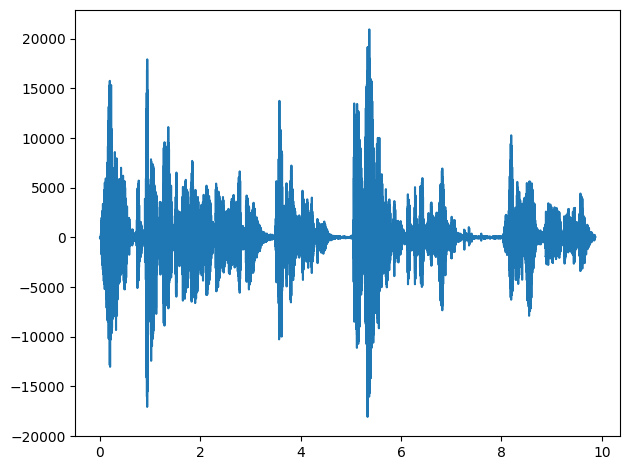

In [72]:
from scipy import signal, fftpack
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

original_fs,original_data = wavfile.read('rawaudio.wav') #loads the file and its sampling frequency
FS = 16000

num_samples = round(len(original_data) * float(new_rate) / original_fs)
data = signal.resample(original_data, num_samples)

t_start = 0
t_end = len(data) / FS

time = np.linspace(t_start, t_end, num_samples)

plt.plot(time, data)
plt.show()

[ 9.46221318e+02-0.00000000e+00j  5.51127256e+03+4.17577282e+03j
 -3.36945990e+03-2.51384323e+03j -7.31568154e+01+4.56182538e+02j
 -1.70352573e+02+2.84126652e+01j  9.43129668e+01+2.58281174e+02j
 -2.48018639e+02+1.51705990e+02j -1.35418310e+02+1.68826549e+02j
 -7.89229938e+01+1.56111357e+02j -1.44716071e+02+1.60317555e+02j
 -1.81187333e+02+8.43286525e+01j -9.18249050e+01+4.69497932e+01j
 -6.36390214e+01+8.42120415e+00j -1.09804144e+02+5.67263796e+01j
 -4.45121374e+01+7.29218916e+00j -5.15171550e+00+6.15397389e+00j
 -3.82779069e+01+2.99074458e+01j  2.30135824e+01+8.65284525e-01j
  2.17519696e+01+7.35841152e+01j -6.32475206e+01+8.53208112e+01j
 -5.80118939e+01+4.17188565e-01j -2.41800366e+00+2.64413606e+01j
 -1.05660212e+02+1.60788270e+01j  8.04623631e+01-1.10694109e+02j
  3.62895575e+01+9.45103841e+01j -1.07661931e+01+7.18700781e+01j
 -2.08198562e+01+8.86040938e+01j -3.03099831e+01+4.10029835e+01j
 -1.59275478e+01+3.61878968e+01j -4.31502868e+00+3.64213184e+01j
 -3.59295415e+01+3.171286

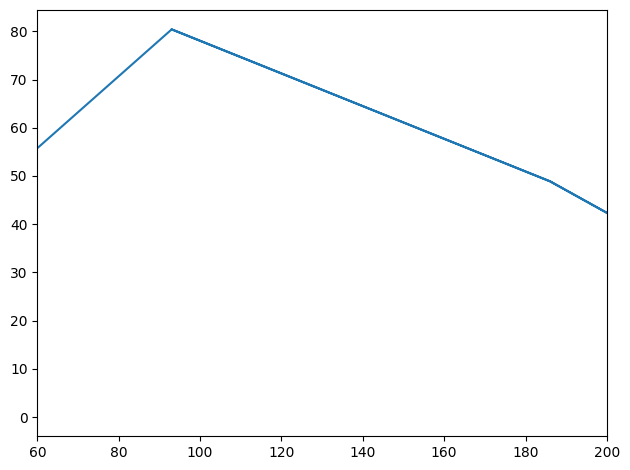

In [73]:
# num_chunks = int(t_end / chunk_size)
num_chunks = 918
chunk_size = t_end / 918
# gives us 172 samples in each chunk

chunk_array = np.split(data, num_chunks)
num_freq_bins = 14

def fft(array):  # run fft
    N = len(array)
    sig_fft = fftpack.fft(array)
    print(sig_fft)
    sig_amp = 2 / N * np.abs(sig_fft)
    sig_freq = np.abs(fftpack.fftfreq(N, 1 / FS))
    return sig_freq, sig_amp

# iterate through each time chunk
for chunk in chunk_array:
    chunk_freq, chunk_amp = fft(chunk_array[0])
    plt.xlim([60,200])
    plt.plot(chunk_freq, chunk_amp)
    
    # for freq_bin in range(0,N):

print(np.shape(chunk_array))